## Exploratory Data Analysis of the Thread App Review Dataset

## 1. Python libraries

In [1]:
# Import pandas.
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')

# Import nltk stopwords.
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Import wordcloud and matplotlib.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to C:\Users\HP
[nltk_data]     i5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     i5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Data Loading

In [2]:
threads_df = pd.read_csv("37000_reviews_of_thread_app.csv",index_col=[0])
threads_df.head()


,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,NaN,Good,5,0,8/7/2023 19:14,NaN,NaN,294.0.0.27.110,en,us
1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,NaN,Weak copy of Twitter,1,0,8/7/2023 19:07,NaN,NaN,NaN,en,us
2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,NaN,i wish threads have a save button for images a...,3,0,8/7/2023 18:57,NaN,NaN,294.0.0.27.110,en,us
3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,NaN,Love it,5,0,8/7/2023 18:37,NaN,NaN,NaN,en,us
4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,NaN,Very god,5,0,8/7/2023 18:14,NaN,NaN,NaN,en,us


In [3]:
threads_df.shape


(36943, 13)

In [4]:
threads_df.columns


Index(['source', 'review_id', 'user_name', 'review_title',
       'review_description', 'rating', 'thumbs_up', 'review_date',
       'developer_response', 'developer_response_date', 'appVersion',
       'laguage_code', 'country_code'],
      dtype='object')

In [5]:
threads_df.describe()

,rating,thumbs_up,developer_response,developer_response_date
count,36943.000000,36943.000000,0.0,0.0
mean,3.349376,1.718485,NaN,NaN
std,1.759170,56.933661,NaN,NaN
min,1.000000,0.000000,NaN,NaN
25%,1.000000,0.000000,NaN,NaN
50%,4.000000,0.000000,NaN,NaN
75%,5.000000,0.000000,NaN,NaN
max,5.000000,5557.000000,NaN,NaN


In [6]:
threads_df.isnull().sum()


source                         0
review_id                      0
user_name                      0
review_title               34943
review_description             0
rating                         0
thumbs_up                      0
review_date                    0
developer_response         36943
developer_response_date    36943
appVersion                 12088
laguage_code                   0
country_code                   0
dtype: int64

In [7]:
#drop irrelevant columns
threads_df = threads_df.drop(['review_title', 'developer_response_date', 'developer_response', 'appVersion'], axis=1)
threads_df.head()

,source,review_id,user_name,review_description,rating,thumbs_up,review_date,laguage_code,country_code
0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,Good,5,0,8/7/2023 19:14,en,us
1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,Weak copy of Twitter,1,0,8/7/2023 19:07,en,us
2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,i wish threads have a save button for images a...,3,0,8/7/2023 18:57,en,us
3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,Love it,5,0,8/7/2023 18:37,en,us
4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,Very god,5,0,8/7/2023 18:14,en,us


## 3. Experiments

In [8]:
#check the unique values for the most important variables
print("Total Unique download stores: ",threads_df['source'].nunique())
print("Total Unique Star ratings: ",threads_df['rating'].nunique())
print("Total Unique Language_code:" ,threads_df['laguage_code'].nunique())
print("Total Unique Country_code:" ,threads_df['country_code'].nunique())
print("Total Unique Thumbs up:" ,threads_df['thumbs_up'].nunique())


Total Unique download stores:  2
Total Unique Star ratings:  5
Total Unique Language_code: 1
Total Unique Country_code: 1
Total Unique Thumbs up: 149


In [9]:
general_avg_rating = threads_df['rating'].mean().round(decimals=1)
print("General Average Rating:", general_avg_rating)

# Average rating for each download store
avg_rating_by_source = threads_df.groupby('source')['rating'].mean().round(decimals=1)
print("\nAverage Rating for Each Download Store:")
print(avg_rating_by_source)

General Average Rating: 3.3

Average Rating for Each Download Store:
source
App Store      3.0
Google Play    3.4
Name: rating, dtype: float64


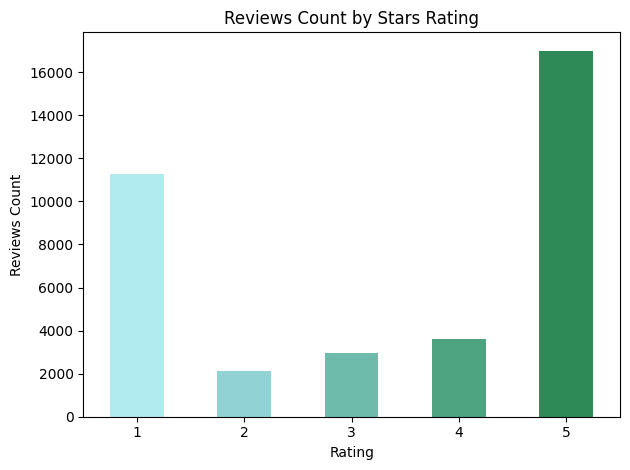

In [10]:
# Number of Reviews by Star rating: group by 'rating' and count reviews.
ratings_review = threads_df['rating'].value_counts().sort_index()

# Plot.
colors = ['#B2EBEF', '#91D3D5', '#6FBBAB', '#4EA381', '#2E8B57']
ratings_review.plot(kind='bar', color=colors)
plt.xlabel('Rating')
plt.ylabel('Reviews Count')
plt.title('Reviews Count by Stars Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
#We have more 5-star ratings though we also have quite a lot of 1-star ratings.
#The rating in-between are argurably not noticeable but they are also important.

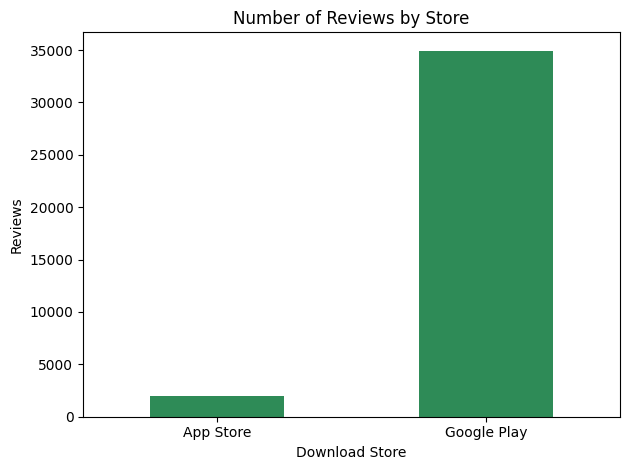

In [11]:
#Number of Downloads by Store: group by 'source' and count reviews.
source_reviews = threads_df['source'].value_counts().sort_index()

# Plot.
source_reviews.plot(kind='bar', color='#2E8B57')
plt.xlabel('Download Store')
plt.ylabel('Reviews')
plt.title('Number of Reviews by Store')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
#Most of the reviews in our dataset come from Google Play store.

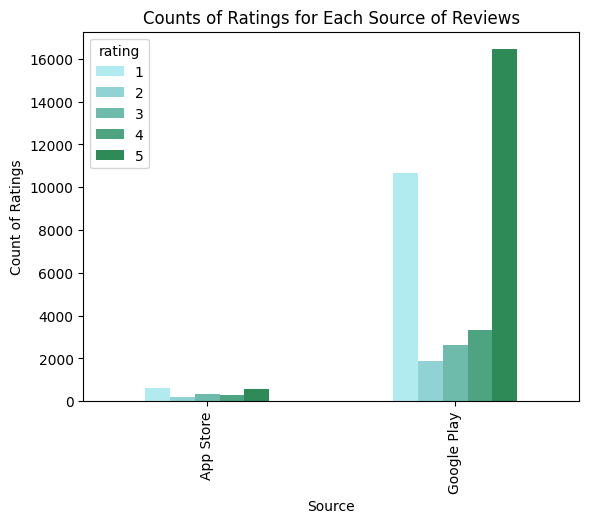

In [12]:
review_per_source = threads_df.groupby('source')['rating'].value_counts().unstack(fill_value=0)

# Plot the bar plot
review_per_source.plot(kind='bar', stacked=False, color=colors)
plt.xlabel('Source')
plt.ylabel('Count of Ratings')
plt.title('Counts of Ratings for Each Source of Reviews')
plt.show()

In [13]:
#Create a wordcloud of our dataframe to understand user's reviews more
# First pre-process the text
def clean_the_code(text):
    text = text.lower()
    text = re.sub('[^a-z0-9]', ' ', text)  # Remove non-alphanumeric characters
    text = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    stemmer = SnowballStemmer("english")
    text = [stemmer.stem(word) for word in text]  # Stemming
    text = [word for word in text if len(word) > 1]  # Remove single characters
    return ' '.join(text)

# Assuming threads_df['review_description'] contains text data
threads_df['transformed_text'] = threads_df['review_description'].apply(clean_the_code)
threads_df.head()

,source,review_id,user_name,review_description,rating,thumbs_up,review_date,laguage_code,country_code,transformed_text
0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,Good,5,0,8/7/2023 19:14,en,us,good
1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,Weak copy of Twitter,1,0,8/7/2023 19:07,en,us,weak copi twitter
2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,i wish threads have a save button for images a...,3,0,8/7/2023 18:57,en,us,wish thread save button imag video would like ...
3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,Love it,5,0,8/7/2023 18:37,en,us,love
4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,Very god,5,0,8/7/2023 18:14,en,us,god


<function matplotlib.pyplot.show(close=None, block=None)>

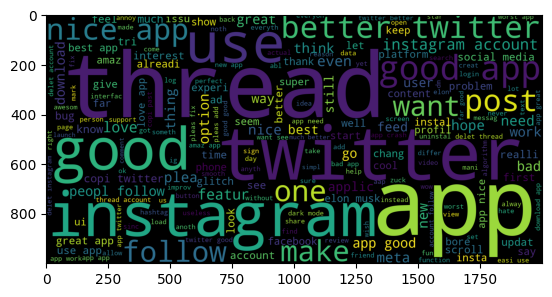

In [14]:
#visualize most used words
text_corpus=' '.join(threads_df['transformed_text'].values)
wc=WordCloud(width=2000, height=1000, background_color='black').generate(text_corpus)
plt.imshow(wc)
plt.show

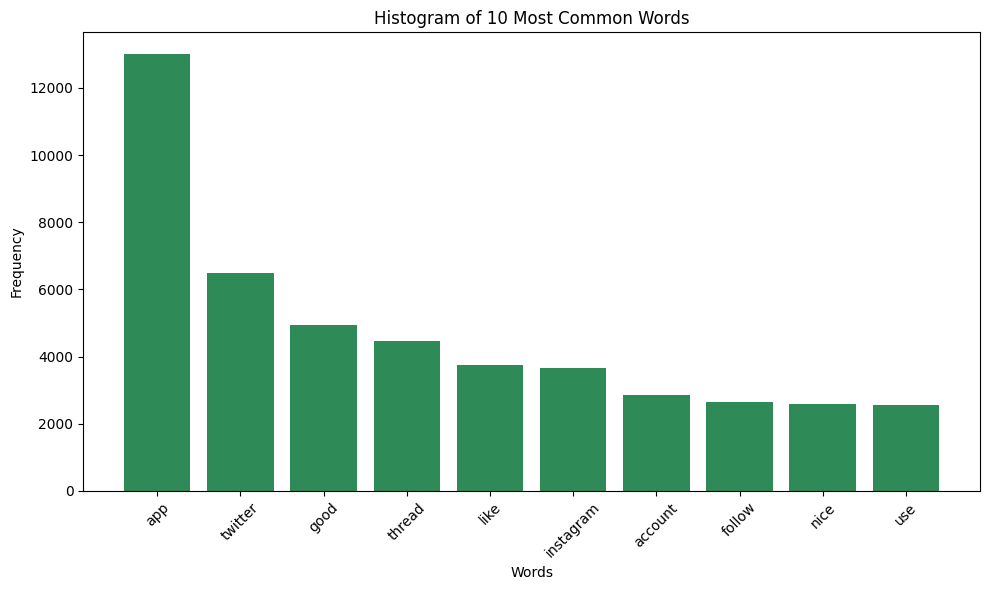

In [22]:
# Histogram of the top 10 most used word in the reviews
text_corpus = ' '.join(threads_df['transformed_text'].values)
words = text_corpus.split()
word_counts = Counter(words)
top_10_words = word_counts.most_common(10)
words = [word[0] for word in top_10_words]
frequencies = [word[1] for word in top_10_words]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='#2E8B57')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram of 10 Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

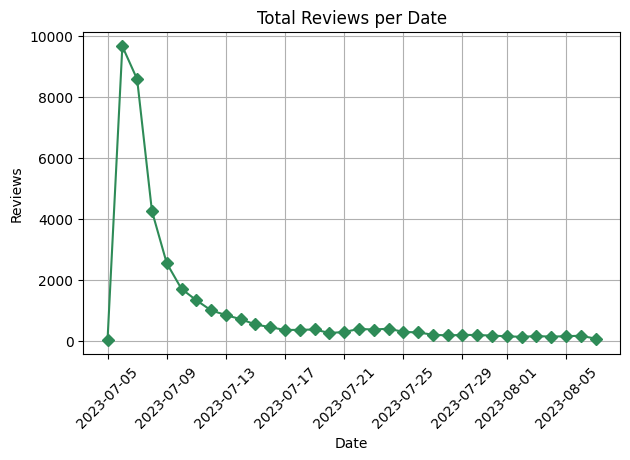

In [23]:
# Time Series Analysis
threads_df['review_date'] = pd.to_datetime(threads_df['review_date']).dt.date
daily_reviews = threads_df.groupby('review_date').size()

# Plot.
daily_reviews.plot(kind='line', marker='D', color='#2E8B57')
plt.xlabel('Date')
plt.ylabel('Reviews')
plt.title('Total Reviews per Date')
plt.tight_layout()
plt.grid(True)
plt.xticks(rotation=45) 
plt.subplots_adjust(bottom=0.25)  
plt.show()
#most of the reviews were made on the first day the app was released, Days later, the number of reviews dropped drastically, with August at a low
